<a href="https://colab.research.google.com/github/rummannaqvi/Jenkins_SharedLib/blob/main/Descriptive_Analysis%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip


--2025-08-18 16:13:19--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [    <=>             ]  22.62M  31.3MB/s    in 0.7s    

2025-08-18 16:13:20 (31.3 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import time
stime = time.time()

In [ ]:
stime

1755533631.150337

In [ ]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
df1.shape


(541909, 8)

In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1[df1['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1.StockCode == "22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [ ]:
most_freq[most_freq.StockCode=="85123A"]


,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3300,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4620,85123A,wrongly marked carton 22804,1
4658,85123A,?,1


In [ ]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq.head(5)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [ ]:
most_freq[most_freq.StockCode=="85123A"]


,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
most_freq.head(3)


,StockCode,freq_Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159


In [ ]:
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0


In [ ]:
df2[df2['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [ ]:
df2['Description'] = df2['Description'].mask(df2['Description'].isnull(), df2['freq_Description'])
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


In [ ]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


In [ ]:
df2.drop(columns = ["freq_Description", "count"], inplace=True)


In [ ]:
df2.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df2[df2.Quantity<=0].shape

(10527, 8)

In [ ]:
df2[df2.UnitPrice<=0].shape

(2405, 8)

In [ ]:
df3 = df2[(df2['Quantity'] > 0) & (df2['UnitPrice'] > 0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df3.Quantity.quantile(0.9999)


np.float64(1439.8763999990188)

In [ ]:
df4 = df3.copy()

df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head(2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
238813,557956,20712,JUMBO BAG WOODLAND ANIMALS,1,2011-06-23 19:20:00,2.08,18283.0,United Kingdom,2.08,6
150958,549525,22893,MINI CAKE STAND T-LIGHT HOLDER,4,2011-04-08 15:44:00,0.83,NaN,United Kingdom,3.32,4


In [ ]:
monthly_sales = df4.groupby('Month')['TotalSales'].sum()
monthly_sales


,TotalSales
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


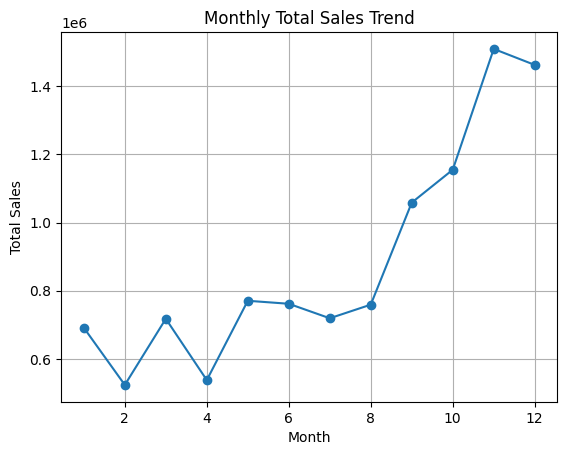

In [ ]:
monthly_sales.plot(kind='line', title='Monthly Total Sales Trend', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


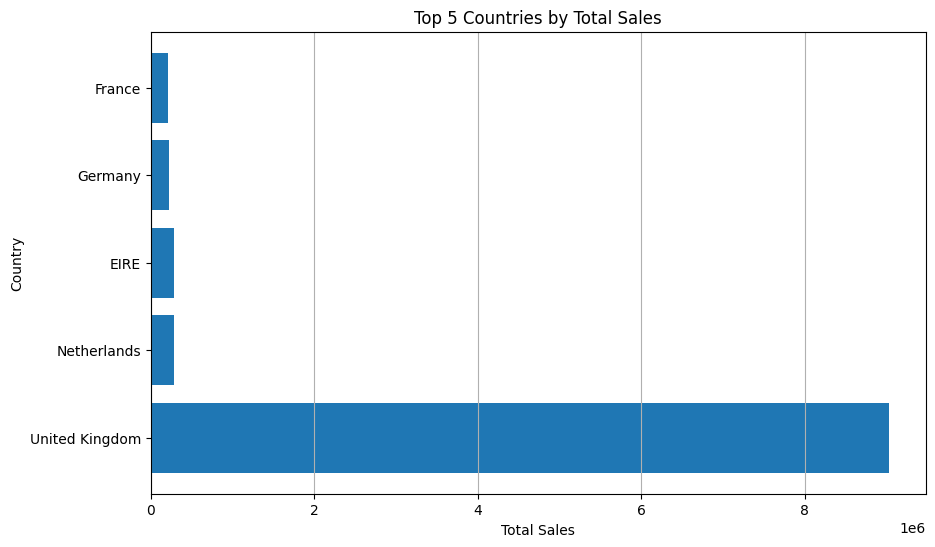

In [ ]:
import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()


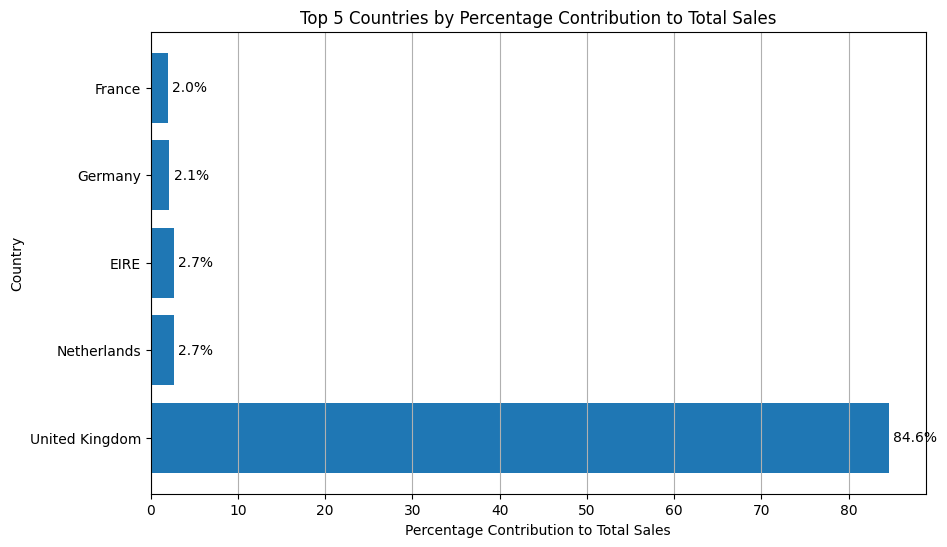

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_countries.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

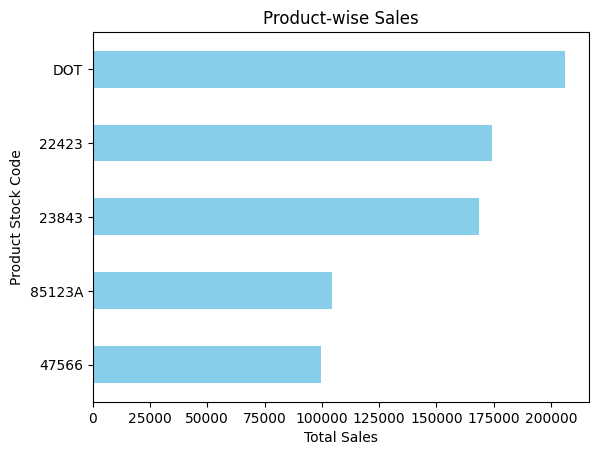

In [ ]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

In [ ]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


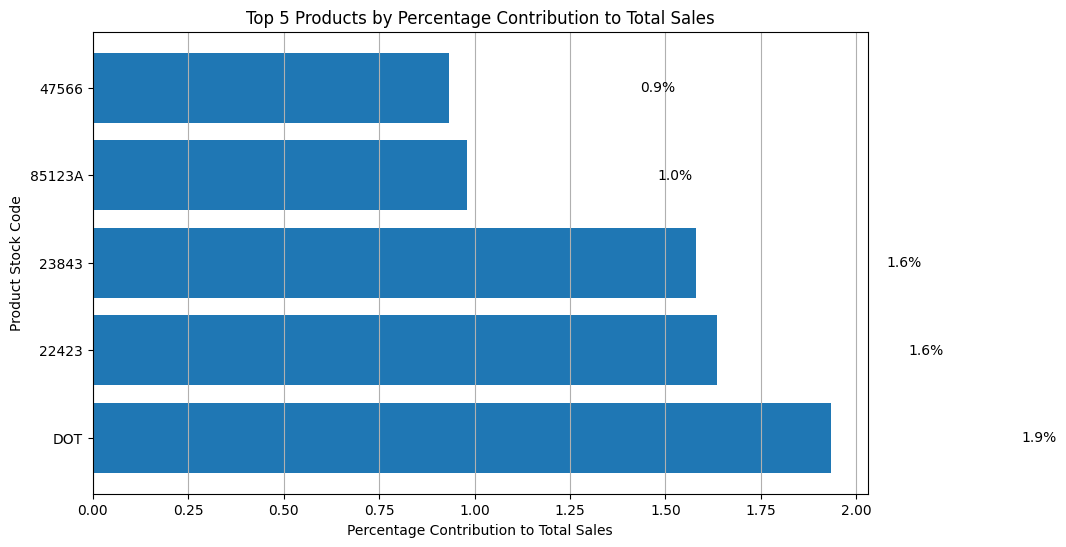

In [ ]:
# prompt: Plot same chart as above for product sales but use percentage this time. Show % on the bar

# Assuming df4 is already created from the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()


In [ ]:
df4['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
rfm.describe()


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [ ]:
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)


In [ ]:
rfm.sample(5)


,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12904.0,18,72,509.58,4,3,2,9
17183.0,8,73,3347.31,4,3,4,11
13635.0,68,62,1071.03,2,3,3,8
16419.0,113,51,972.23,2,3,3,8
16413.0,57,31,262.20,2,2,1,5


In [ ]:
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,11,225.60,1,1,1,3
18185.0,249,17,304.25,1,1,1,3
18190.0,192,15,284.46,1,1,1,3


In [ ]:
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [ ]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [ ]:
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)


,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


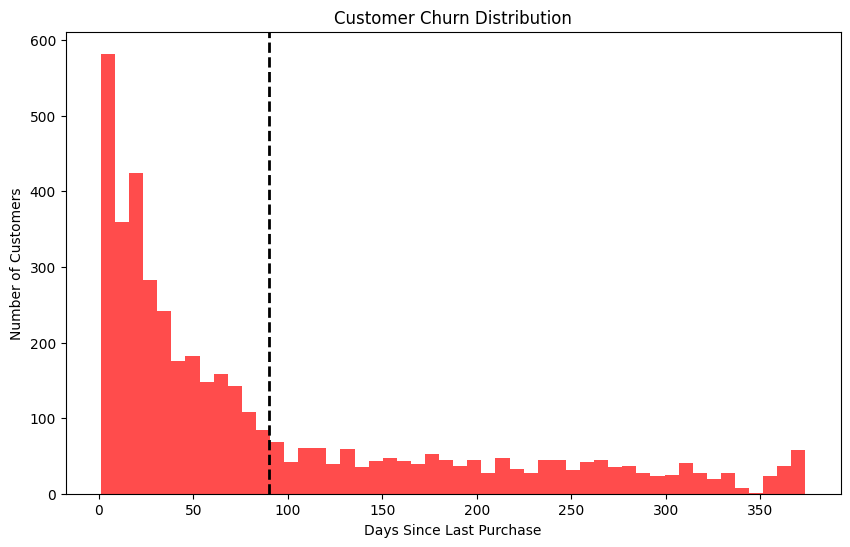

In [ ]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

